In [47]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [49]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
#Downloading Dataset

_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin = _URL,
                                  fname = "flower_photos.tgz",
                                  extract = True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 59s 0us/step


In [7]:
"""
The dataset we downloaded contains images of 5 types of flowers:

Rose
Daisy
Dandelion
Sunflowers
Tulips
"""
#So, let's create the labels for these 5 classes
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [ ]:
"""
Also, the dataset we have downloaded has following directory structure.

flower_photos
|__ daisy
|__ dandelion
|__ roses
|__ sunflowers
|__ tulips
"""
"""
As you can see there are no folders containing training and validation data. Therefore, we will have to create our own training and validation set. Let's write some code that will do this.

The code below creates a train and a val folder each containing 5 folders (one for each type of flower).
It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation set.
In the end our directory will have the following structure:

flower_photos
|__ daisy
|__ dandelion
|__ roses
|__ sunflowers
|__ tulips
|__ train
    |______ daisy: [1.jpg, 2.jpg, 3.jpg ....]
    |______ dandelion: [1.jpg, 2.jpg, 3.jpg ....]
    |______ roses: [1.jpg, 2.jpg, 3.jpg ....]
    |______ sunflowers: [1.jpg, 2.jpg, 3.jpg ....]
    |______ tulips: [1.jpg, 2.jpg, 3.jpg ....]
 |__ val
    |______ daisy: [507.jpg, 508.jpg, 509.jpg ....]
    |______ dandelion: [719.jpg, 720.jpg, 721.jpg ....]
    |______ roses: [514.jpg, 515.jpg, 516.jpg ....]
    |______ sunflowers: [560.jpg, 561.jpg, 562.jpg .....]
    |______ tulips: [640.jpg, 641.jpg, 642.jpg ....]
    /
"""
#Since we don't delete the original folders, they will still be in our flower_photos directory, but they will be empty.
#The code below also prints the total number of flower images we have for each type of flower.

In [11]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 26 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [20]:
#For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
###Data Augmentation

"""
Overfitting generally occurs when we have small number of training examples.
One way to fix this problem is to augment our dataset so that it has sufficient number of training examples.
Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images.
The goal is that at training time, your model will never see the exact same picture twice.
This helps expose the model to more aspects of the data and generalize better.

In tf.keras we can implement this using the same ImageDataGenerator class we used before.
We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

"""

In [21]:
###Experiment with Various Image Transformations

"""
In this section you will get some practice doing some basic image transformations.
Before we begin making transformations let's define our batch_size and our image size.
Remember that the input to our CNN are images of the same size.
We therefore have to resize the images in our dataset to the same size.
"""

###Set Batch and Image Size
#below, create a batch_size of 100 images and set a value to IMG_SHAPE such that our training data consists of images with width of 150 pixels and height of 150 pixels.

#Setting model parameters
batch_size = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [24]:
###Apply Random Horizontal Flip
#below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 3058 images belonging to 5 classes.


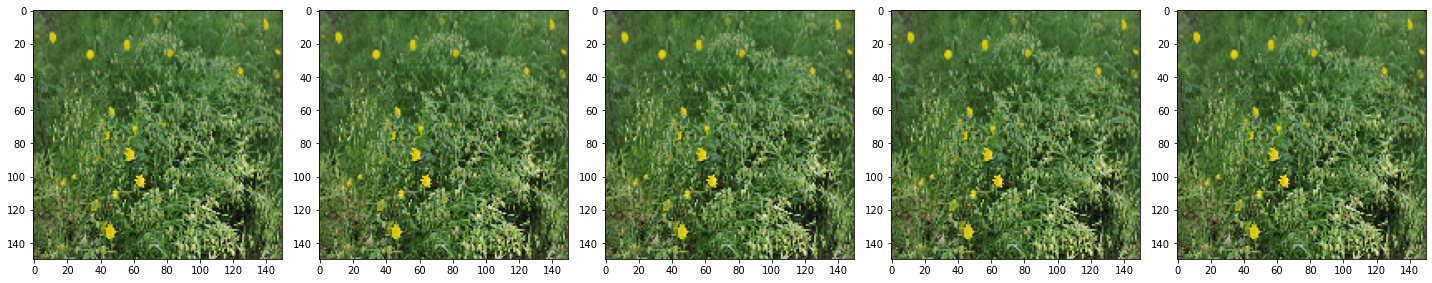

In [25]:
#Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [26]:
###Apply Random Rotation

#below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random 45 degree rotation. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size= batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE))

Found 3058 images belonging to 5 classes.


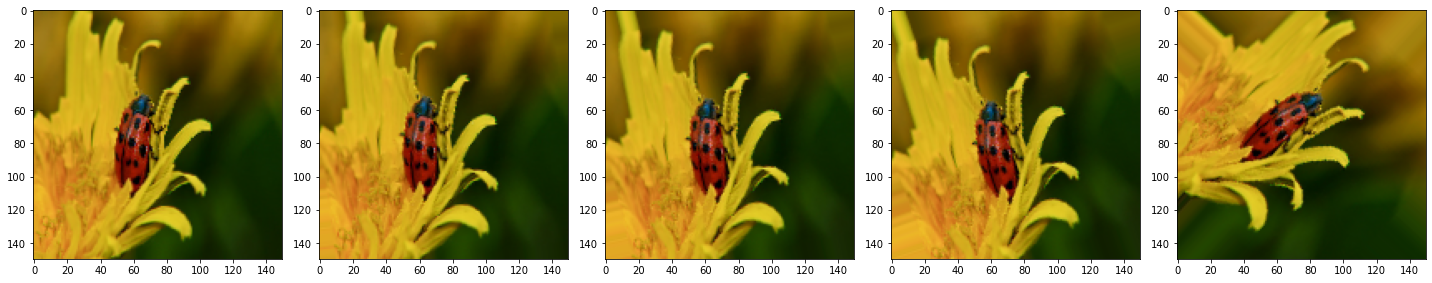

In [27]:
#Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [28]:
###Apply Random Zoom

#below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random zoom of up to 50%. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE))

Found 3058 images belonging to 5 classes.


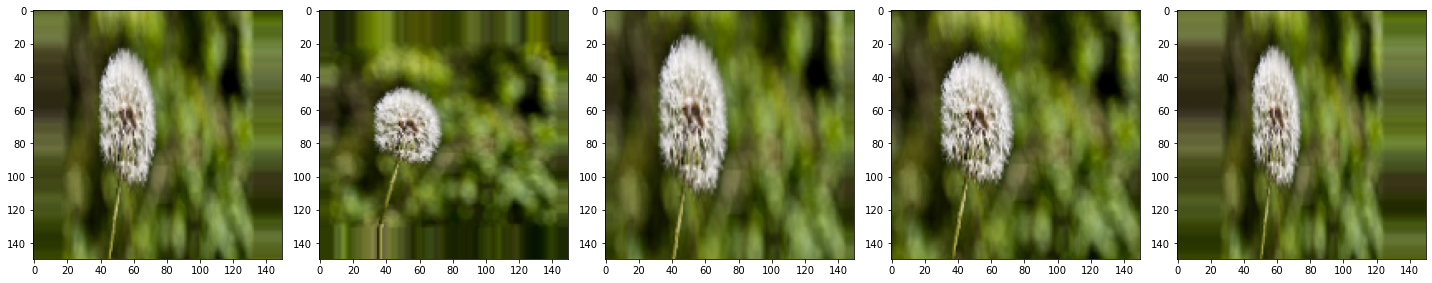

In [29]:
#Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [30]:
#Put It All Together

"""
below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

random 45 degree rotation
random zoom of up to 50%
random horizontal flip
width shift of 0.15
height shift of 0.15
"""
"""
Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to sparse.
"""

image_gen_train = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.15,
                                    zoom_range = 0.5,
                                    horizontal_flip = True)

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_SHAPE, IMG_SHAPE),
                                                    class_mode = 'sparse')

Found 3058 images belonging to 5 classes.


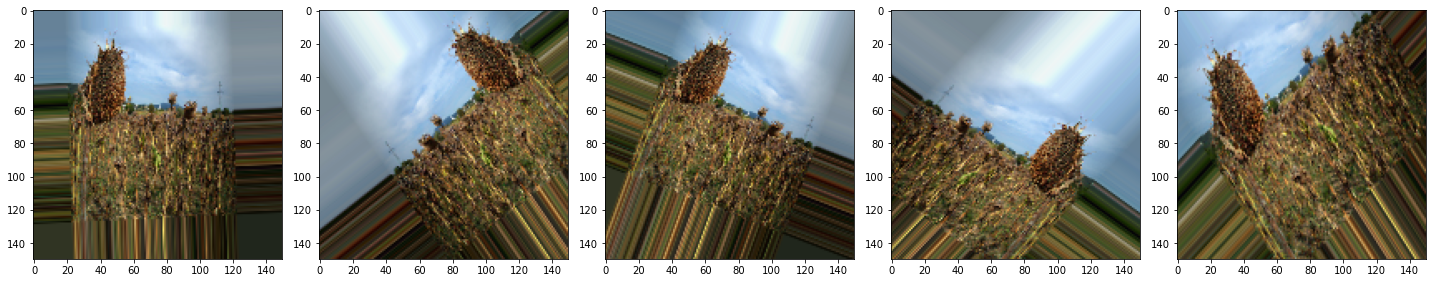

In [31]:
#Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset.

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [33]:
###Create a Data Generator for the Validation Set

"""
Generally, we only apply data augmentation to our training examples.
below, use ImageDataGenerator to create a transformation that only rescales the images by 255.
Then use the .flow_from_directory method to apply the above transformation to the images in our validation set.
Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse.
Remember that it is not necessary to shuffle the images in the validation set.
"""

image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size,
                                                 directory = val_dir,
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 class_mode = 'sparse')

Found 612 images belonging to 5 classes.


In [34]:
###Create the CNN

"""
below, create a convolutional neural network that consists of 3 convolution blocks.
Each convolutional block contains a Conv2D layer followed by a max pool layer.
The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters.
All convolutional filters should be 3 x 3.
All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units.
The CNN should output class probabilities based on 5 classes which is done by the softmax activation function.
All other layers should use a relu activation function.
You should also add Dropout layers with a probability of 20%, where appropriate.
"""

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [41]:
###Compile the Model

#In the cell below, compile your model using the ADAM optimizer,
#the sparse cross entropy function as a loss function.
#We would also like to look at training and validation accuracy on each epoch as we train our network,
#so make sure you also pass the metrics argument.

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [42]:
#Model Summary (not a part of exercise)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [44]:
###Train the Model

"""
below, train your model using the fit_generator function instead of the usual fit function.
We have to use the fit_generator function because we are using the ImageDataGenerator class to generate batches of training and validation data for our model.
Train the model for 80 epochs and make sure you use the proper parameters in the fit_generator function.
"""

epochs = 80

history = history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

C:\Users\fortn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
31/31 [==============================] - 200s 6s/step - loss: 1.8043 - accuracy: 0.2464 - val_loss: 1.2763 - val_accuracy: 0.4690
Epoch 2/80
31/31 [==============================] - 109s 3s/step - loss: 1.2459 - accuracy: 0.4873 - val_loss: 1.1470 - val_accuracy: 0.5931
Epoch 3/80
31/31 [==============================] - 94s 3s/step - loss: 1.1091 - accuracy: 0.5591 - val_loss: 0.8820 - val_accuracy: 0.7157
Epoch 4/80
31/31 [==============================] - 107s 3s/step - loss: 1.0392 - accuracy: 0.5957 - val_loss: 0.9490 - val_accuracy: 0.6667
Epoch 5/80
31/31 [==============================] - 108s 3s/step - loss: 0.9819 - accuracy: 0.6052 - val_loss: 0.8681 - val_accuracy: 0.6928
Epoch 6/80
31/31 [==============================] - 95s 3s/step - loss: 0.9835 - accuracy: 0.6091 - val_loss: 0.9519 - val_accuracy: 0.6422
Epoch 7/80
31/31 [==============================] - 96s 3s/step - loss: 0.9600 - accuracy: 0.6233 - val_loss: 0.7269 - val_accuracy: 0.7467
Epoch 8/80
31/31

31/31 [==============================] - 84s 3s/step - loss: 0.4463 - accuracy: 0.8196 - val_loss: 0.5849 - val_accuracy: 0.8039
Epoch 60/80
31/31 [==============================] - 83s 3s/step - loss: 0.4273 - accuracy: 0.8448 - val_loss: 0.6613 - val_accuracy: 0.7827
Epoch 61/80
31/31 [==============================] - 83s 3s/step - loss: 0.4297 - accuracy: 0.8383 - val_loss: 0.6129 - val_accuracy: 0.8203
Epoch 62/80
31/31 [==============================] - 83s 3s/step - loss: 0.4126 - accuracy: 0.8508 - val_loss: 0.6403 - val_accuracy: 0.8121
Epoch 63/80
31/31 [==============================] - 83s 3s/step - loss: 0.4151 - accuracy: 0.8409 - val_loss: 0.7619 - val_accuracy: 0.7876
Epoch 64/80
31/31 [==============================] - 85s 3s/step - loss: 0.4070 - accuracy: 0.8491 - val_loss: 0.6911 - val_accuracy: 0.7925
Epoch 65/80
31/31 [==============================] - 87s 3s/step - loss: 0.4053 - accuracy: 0.8519 - val_loss: 0.5923 - val_accuracy: 0.8284
Epoch 66/80
31/31 [======

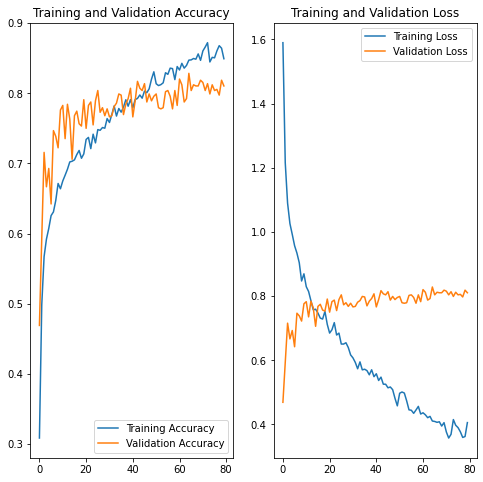

In [51]:
###Plot Training and Validation Graphs

#below, plot the training and validation accuracy/loss graphs.

epochs = 80

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
###Summary

"""
Convolutional Neural Networks work with color images and saw various techniques that we can use to avoid overfitting . The main key points of this lesson are:

CNNs with RGB Images of Different Sizes:

Resizing: When working with images of different sizes, you must resize all the images to the same size so that they can be fed into a CNN.
Color Images: Computers interpret color images as 3D arrays.
RGB Image: Color image composed of 3 color channels: Red, Green, and Blue.
Convolutions: When working with RGB images we convolve each color channel with its own convolutional filter. Convolutions on each color channel are performed in the same way as with grayscale images, i.e. by performing element-wise multiplication of the convolutional filter (kernel) and a section of the input array. The result of each convolution is added up together with a bias value to get the convoluted output.
Max Pooling: When working with RGB images we perform max pooling on each color channel using the same window size and stride. Max pooling on each color channel is performed in the same way as with grayscale images, i.e. by selecting the max value in each window.
Validation Set: We use a validation set to check how the model is doing during the training phase. Validation sets can be used to perform Early Stopping to prevent overfitting and can also be used to help us compare different models and choose the best one.
Methods to Prevent Overfitting:

Early Stopping: In this method, we track the loss on the validation set during the training phase and use it to determine when to stop training such that the model is accurate but not overfitting.
Image Augmentation: Artificially boosting the number of images in our training set by applying random image transformations to the existing images in the training set.
Dropout: Removing a random selection of a fixed number of neurons in a neural network during training.
"""